<hr style="border:2px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal Aplicada para Ciencia de Datos</h1></center> 
<center><h1 style="color:#173F8A;"> MDS3120 - 2024 - B3</h1></center>
<hr style="border:2px solid #FEC60D"> </hr>
<h3 style="color:#0176DE;text-align:right;"> Profesores: &nbsp;Manuel A. Sanchez<br>Carlos Sing-Long<br></h3>

<h3 style="color:#03122E;text-align:right;"> 
    Magister en Ciencia de Datos - MDS <br> 
    Instituto de Ingenieria Matematica y Computacional - IMC<br>  
    Pontificia Universidad Catolica de Chile <br>   
</h3>

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tutorial 7: Descomposicion en valores propios</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

## Tabla de Contenidos
1. [**Tutorial:** Ejemplo: Calculo de valores propios](#Ejemplo:-Calculo-de-valores-propios)
2. [**Tutorial:** Ejemplo: Calculo de valores propios matrices sparse](#Ejemplo:-Calculo-de-valores-propios-2)
3. [**Tutorial:** Ejemplo: PageRank](#Ejemplo:-PageRank)
4. [**Tutorial:** Ejemplo: PageRank, California](#Ejemplo:-PageRank-California)

In [2]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))
np.set_printoptions(precision=4)
import scipy.linalg as LA
import scipy.sparse.linalg as sLA
import pandas as pd

import time
import scipy.sparse as sps
from scipy.sparse.linalg import aslinearoperator

## Ejemplo: Calculo de valores propios

Calculo con funcion general ``scipy.linalg.eig`` y para matrices simetricas``scipy.linalg.eigh``

In [3]:
A = np.array([[3,1],[1,3]], dtype=np.float64)
lamb, V = LA.eigh(A);Vinv = np.linalg.inv(V)

lamb1, V1 = LA.eig(A);V1inv = np.linalg.inv(V1)
print(f"chequeando si es diagonalizable: {np.linalg.norm(A - V@(np.diag(lamb))@Vinv) }")
print(f"chequeando si es diagonalizable: {np.linalg.norm(A - V1@(np.diag(lamb1))@V1inv) }")

chequeando si es diagonalizable: 0.0
chequeando si es diagonalizable: 0.0


In [4]:
B = np.array([[1,1],[0,1]])
# B = np.array([[1,1,0],[0,1,1],[0,0,1]], dtype=np.float64)
lamb, V = LA.eig(B)
Vinv = np.linalg.inv(V)
print(f"chequeando si es diagonalizable: {np.linalg.norm(B - V@(np.diag(lamb))@Vinv) }")

print(f"chequeando valore y vector propio: { np.linalg.norm(A.dot(V[:,0] - lamb[0]*V[:,0]))}")


chequeando si es diagonalizable: 1.0
chequeando valore y vector propio: 0.0


## Ejemplo: Calculo de valores propios 2

Calculo par Matrices sparse y grandes ``scipy.sparse.linalg.eigs``y para matrices simetricas ``scipy.sparse.linalg.eigsh``

In [5]:
def Matrizdediferencias(n):
    Dn = np.zeros((n-1,n))
    for i in range(n-1):
        Dn[i,i] = -1.0
        Dn[i,i+1] = 1.0
    return Dn

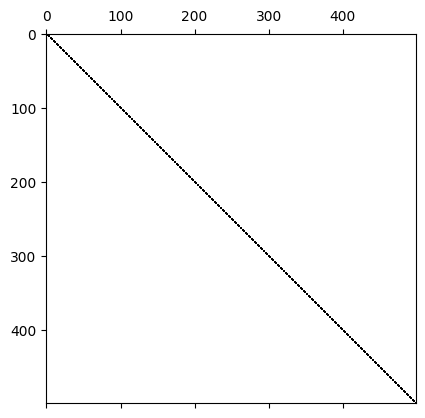

In [32]:
n=501
Dn = Matrizdediferencias(n)
Dnm1 = Matrizdediferencias(n-1)
Delta = -(n-1)**2*Dnm1.dot(Dn)
plt.spy(Delta[:,1:n-1])
plt.show()

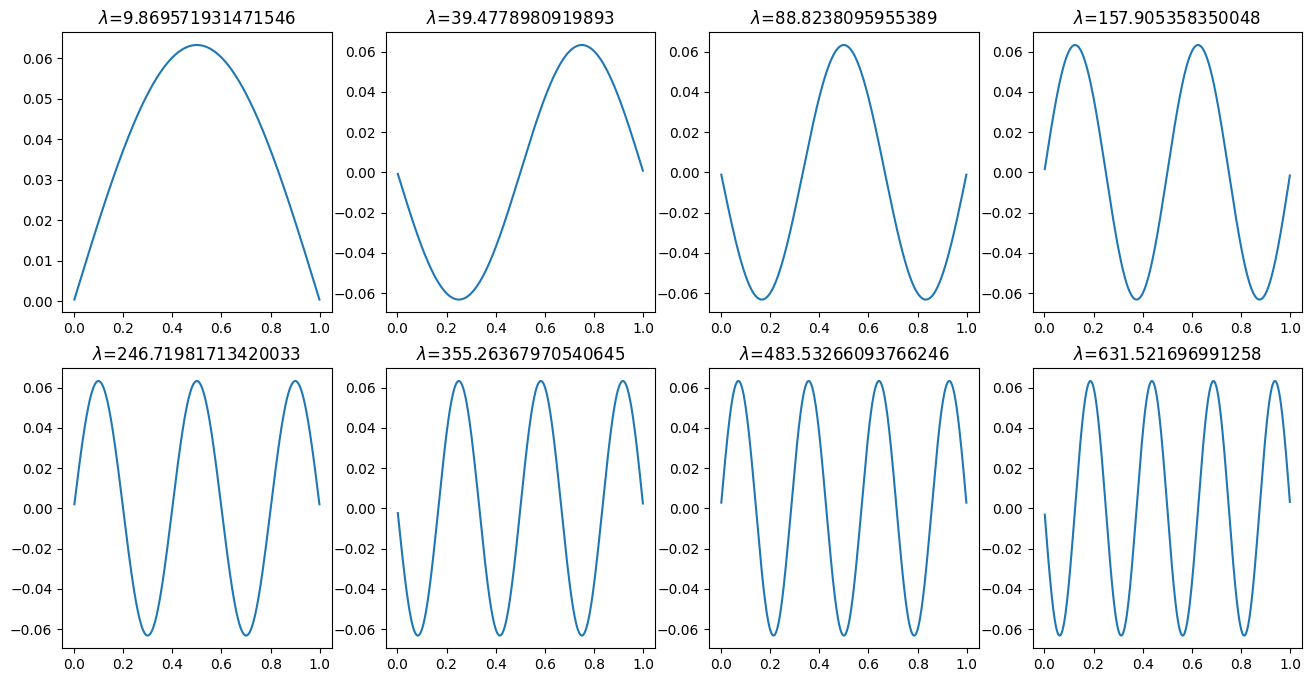

In [33]:
eigenval, V = sLA.eigsh(Delta[:,1:n-1], k=10, which='SM')
t = np.array([ i/(n-1) for i in range(n)])

figplots, axplots = plt.subplots(2,4, figsize=(16,8))
for j, axp in enumerate(figplots.axes):
    axp.plot(t[1:n-1], V[:,j])
    axp.title.set_text(r'$\lambda$=' + str(eigenval[j]))
plt.show()

## Ejemplo: PageRank
$$
A =
\begin{bmatrix}
0 & 0 & 1 & 1/2 \\ 1/3 & 0 & 0 & 0 \\ 1/3 & 1/2 & 0 & 1/2 \\ 1/3 & 1/2 & 0 & 0
\end{bmatrix}
$$

In [34]:
A = np.array([[0,0,1,1/2],[1/3,0,0,0],[1/3,1/2,0,1/2],[1/3,1/2,0,0]])

valores_propios, vectores_propios = sLA.eigs(A)
lam = valores_propios[0].real
x = (vectores_propios[:,0]).real
print("valor propio :", lam)
print("vector propio:", x)


valor propio : 1.000000000000002
vector propio: [0.721  0.2403 0.5408 0.3605]


c:\users\manuel sánchez\appdata\local\programs\python\python37\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


In [70]:
def iteracion_de_potencia(A, x=None, MAXITER=100, TOL=1e-8):
    n = A.shape[0]
    # Inicializamos un vector aleatorio si no es dado
    if x is None: x = np.random.rand(n)
    # Calculamos el autovalor aproximado
    eigenvalue = np.dot(np.dot(A, x), x) / np.dot(x, x)
    Ax = np.dot(A, x)
    
    niter=0
    while niter<MAXITER and np.linalg.norm(Ax - eigenvalue * x) > TOL:
        # Calculamos la norma del vector Ax
        norm = np.linalg.norm(Ax, 2)
        
        # Normalizamos el vector x
        x = Ax / norm
        # Multiplicamos la matriz A por el vector x
        Ax = np.dot(A, x)
        # Calculamos el autovalor aproximado
        eigenvalue = np.dot(np.dot(A, x), x) / np.dot(x, x)
        niter+=1
    return eigenvalue, x, niter

# Ejemplo de uso
A= np.array([[4, -1, 2], [2, 1, 6], [-1, 2, 3]])
eigenvalue, eigenvector, niter = iteracion_de_potencia(A)

print("Autovalor aproximado:", eigenvalue)
print("Vector propio asociado:", eigenvector)


Autovalor aproximado: 5.578020629193751
Vector propio asociado: [0.1898 0.81   0.5548]


In [73]:
A = np.array([[0,0,1,1/2],[1/3,0,0,0],[1/3,1/2,0,1/2],[1/3,1/2,0,0]])
eigenvalue, eigenvector, niter = iteracion_de_potencia(A, MAXITER=10000)
print("Autovalor aproximado:", eigenvalue)
print("Vector propio asociado:", eigenvector)
print("numero de iteracion :", niter)

Autovalor aproximado: 1.0000000023909805
Vector propio asociado: [0.721  0.2403 0.5408 0.3605]
numero de iteracion : 31


## Ejemplo: PageRank California

In [7]:
#nombre del archivo
name = "gr0.California.txt"

#Leemos el archivo
df = pd.read_csv(name, delimiter=" ", header=None, names=["data_type", "origin", "end"])

In [8]:
display(df)

,data_type,origin,end
0,n,0,http://www.berkeley.edu/
1,n,1,http://www.caltech.edu/
2,n,2,http://www.realestatenet.com/
3,n,3,http://www.ucsb.edu/
4,n,4,http://www.washingtonpost.com/wp-srv/national/...
...,...,...,...
25809,e,9663,1806
25810,e,9663,266
25811,e,9663,7905
25812,e,9663,70


### Separamos las paginas de los links

In [9]:
#Para identificar cuantas páginas web distintas tenemos
Paginas = df.loc[df["data_type"]=="n"]
display(Paginas)
N_pages = Paginas.shape[0]

,data_type,origin,end
0,n,0,http://www.berkeley.edu/
1,n,1,http://www.caltech.edu/
2,n,2,http://www.realestatenet.com/
3,n,3,http://www.ucsb.edu/
4,n,4,http://www.washingtonpost.com/wp-srv/national/...
...,...,...,...
9659,n,9659,http://www.spd.louisville.edu/~mejenn01/handy....
9660,n,9660,http://www.maxwellstreet.org/
9661,n,9661,http://village.ios.com/~internet/
9662,n,9662,http://www.meats.net/


In [10]:
aristas_df = df.loc[df["data_type"]=="e"][["origin", "end"]]
display(aristas_df)

origin_array = np.array(aristas_df["origin"])
end_array = np.array(aristas_df["end"], dtype=int)

aristas = np.dstack((origin_array, end_array))[0]
print(aristas)

,origin,end
9664,0,449
9665,0,450
9666,0,451
9667,0,452
9668,0,453
...,...,...
25809,9663,1806
25810,9663,266
25811,9663,7905
25812,9663,70


[[   0  449]
 [   0  450]
 [   0  451]
 ...
 [9663 7905]
 [9663   70]
 [9663 7907]]


### Construccion matriz

In [24]:
Lk = {i: (len(np.where(aristas[:,0] == i)[0]),                                # Cantidad de nodos que salen de i
           aristas[np.where(aristas[:,1] == i)[0], 0]) for i in range(N_pages)} # Nodos de salida con camino a i

In [25]:
def Matrix(Lk, mod=False, alpha=0.85):
    N = len(Lk.keys())
    A = np.zeros((N, N), dtype=float)
    for i, (ni, List) in Lk.items():
        for j in List:
            nj, _ = Lk[j]
            A[i, j] = 1.0/float(nj)
    e = np.ones(N, dtype=float)
    v = np.copy(e)/N  #vector de probabilidades (entradas >=0 que suman 1)
    a = np.zeros(N, dtype=float)
    if mod:
        for i, (ni, _) in Lk.items():
            if ni == 0:
                a[i] = 1
        A1 = A + np.outer(v, a)
        A2 = alpha*A1 + (1-alpha)*np.outer(v, e)
        return A2
    return A

In [ ]:
### Ejemplo anterior

[[0.     0.     1.     0.5   ]
 [0.3333 0.     0.     0.    ]
 [0.3333 0.5    0.     0.5   ]
 [0.3333 0.5    0.     0.    ]]


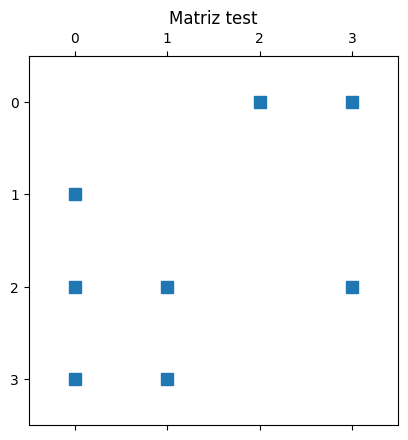

In [30]:
test_edges = np.array([[0, 1],
                       [0, 2],
                       [0, 3],
                       [1, 2],
                       [1, 3],
                       [2, 0],
                       [3, 0],
                       [3, 2]])
Ntest = 4

test_Lk = {i: (len(np.where(test_edges[:,0] == i)[0]),                                # Cantidad de nodos que salen de i
           test_edges[np.where(test_edges[:,1] == i)[0], 0]) for i in range(Ntest)}

Atest = Matrix(test_Lk)
plt.spy(Atest, markersize=8)
plt.title("Matriz test")
print(Atest)
plt.show()

### La matriz asociada a los datos

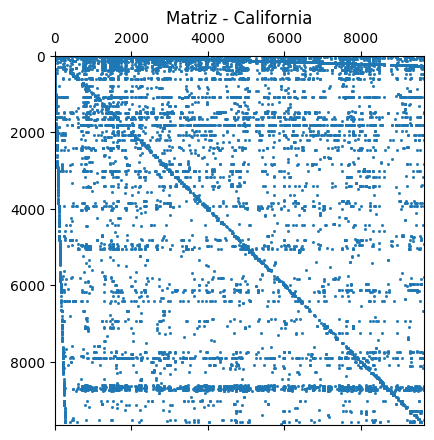

In [32]:
A = Matrix(Lk, mod=False)
plt.spy(A, markersize=1)
plt.title("Matriz - California")
plt.show()

### Algritmo de iteracion de potencia

In [46]:
def potencia(A, tol=1e-8, MAXITER=1000):
    """
    Input: A cuadrada
    Output: valor propio mayor modulo
    """
    t1 = time.time()
    m, n = A.shape
    # LO = aslinearoperator(A)
    LO= sps.csr_matrix(A)
    x = (1/n)*np.ones(n, dtype=float)
    gamma = 0
    
    e_list = []
    error = 1.0# np.linalg.norm(LO.matvec(x) - gamma*x)
    e_list.append(error)
    i = 0
    
    while error > tol and i<MAXITER:
        
        # Aproximación de vector propio (spdg, unitario)
        # y = LO.matvec(x)
        y = LO.dot(x)
        y = y/np.linalg.norm(y)
        
        #Aproximación del valor propio
        # gamma = np.dot(y, LO.matvec(y))
        gamma = np.dot(y, LO.dot(y))
        
        #Cambiamos la condición de parada para el problema
        error = np.linalg.norm(x-y, ord=1)
        e_list.append(error)
        
        #actualizacion para siguiente iteración
        x = y
        i += 1
    t2 = time.time()
    print(f"El mayor valor propio es: {gamma}")
    print(f"Se demoró un tiempo de {t2-t1:.2f} segundos en hacer {i} iteraciones")
    return x/np.linalg.norm(x, ord=1), e_list

In [56]:
A = Matrix(Lk, mod=True)

# error_list_list = []
# scores_list = []
scores, e_list = potencia(A, tol=1e-14, MAXITER=1e6)
# scores_list.append(scores)
# error_list_list.append(e_list)
print(50*"-")

El mayor valor propio es: 1.0000000000000095
Se demoró un tiempo de 49.48 segundos en hacer 198 iteraciones
--------------------------------------------------


In [57]:
#Mascara que ordena los scores en orden descendente
sort_mask = np.argsort(scores)[::-1]

#Scores ordenados en orden descendente
sorted_scores = scores[sort_mask]

In [58]:
print(f"Los mejores 3 scores son: {sorted_scores[:3]}")

Los mejores 3 scores son: [0.0062 0.0061 0.0048]


In [59]:
print("10 páginas con mejor score: ")
display(Paginas["end"].loc[Paginas["origin"][sort_mask[:10]]])

10 páginas con mejor score: 


1488                              http://www.ucdavis.edu/
4391                           http://search.ucdavis.edu/
66                             http://www.california.edu/
6427    http://home.netscape.com/comprod/mirror/index....
4823                              http://www.berkeley.edu
2078                         http://www.linkexchange.com/
0                                http://www.berkeley.edu/
1489                                  http://www.uci.edu/
1617                                    http://www.ca.gov
2408                              http://www.lib.uci.edu/
Name: end, dtype: object